# Gradient Boosting Machines (GBM)

## Description:
 Gradient Boosting Machines are powerful ensemble techniques known for their high effectiveness in classification and regression tasks. They build an ensemble of weak prediction models, typically decision trees, in a stage-wise fashion and optimize an arbitrary differentiable loss function.



In [11]:
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import helper

In [12]:

X_train, X_test, y_train, y_test = helper.get_test_train_split()


n_estimators: 1, RMSE: 1.8334802808064103
n_estimators: 2, RMSE: 1.8042677846681217
n_estimators: 3, RMSE: 1.7790451992735936
n_estimators: 4, RMSE: 1.7574848483293544
n_estimators: 5, RMSE: 1.740217830364273
n_estimators: 6, RMSE: 1.7236827211676211
n_estimators: 7, RMSE: 1.7135156821538469
n_estimators: 8, RMSE: 1.7019637502930904
n_estimators: 9, RMSE: 1.6845071213370721
n_estimators: 10, RMSE: 1.6698204241391583
n_estimators: 11, RMSE: 1.6542869826225481
n_estimators: 12, RMSE: 1.6415833954285257
n_estimators: 13, RMSE: 1.628323462099727
n_estimators: 14, RMSE: 1.6265746011108384
n_estimators: 15, RMSE: 1.6191122595665586
n_estimators: 16, RMSE: 1.6132597724908608
n_estimators: 17, RMSE: 1.608266314181407
n_estimators: 18, RMSE: 1.5986778759701308
n_estimators: 19, RMSE: 1.5937079799664449
n_estimators: 20, RMSE: 1.5843420472931156
n_estimators: 21, RMSE: 1.579560641654349
n_estimators: 22, RMSE: 1.575580369360805
n_estimators: 23, RMSE: 1.5707171064940868
n_estimators: 24, RMSE: 1

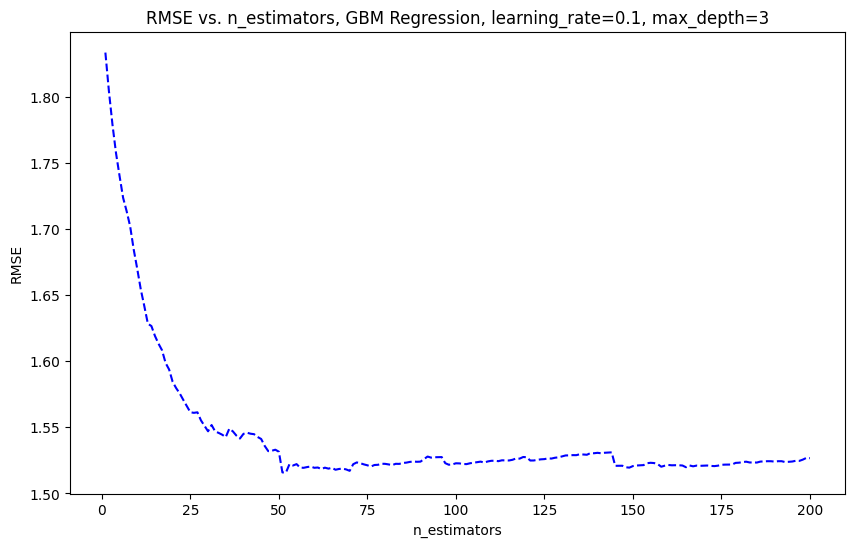

Best n_estimators: 52, RMSE: 1.5156957735810037


In [13]:


n_estimators = np.linspace(1, 200, 200, dtype=int)
results = []
best_estimator = 0
best_rmse = 0

if (1):
    for n in n_estimators:
        model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=3, random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        print(f'n_estimators: {n}, RMSE: {rmse}')
        results.append(rmse)
        if best_rmse == 0 or rmse < best_rmse:
            best_rmse = rmse
            best_estimator = n

    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators, results, color='blue', linestyle='dashed', markersize=10)
    plt.title('RMSE vs. n_estimators, GBM Regression, learning_rate=0.1, max_depth=3')
    plt.xlabel('n_estimators')
    plt.ylabel('RMSE')
    plt.show()
    print(f'Best n_estimators: {best_estimator}, RMSE: {best_rmse}')


MSE: 2.4011798124181056
ratio
count    299.000000
mean       2.674210
std       13.710987
min        0.000001
25%        0.630727
50%        1.173096
75%        2.001807
max      231.909364
Name: revenue, dtype: float64


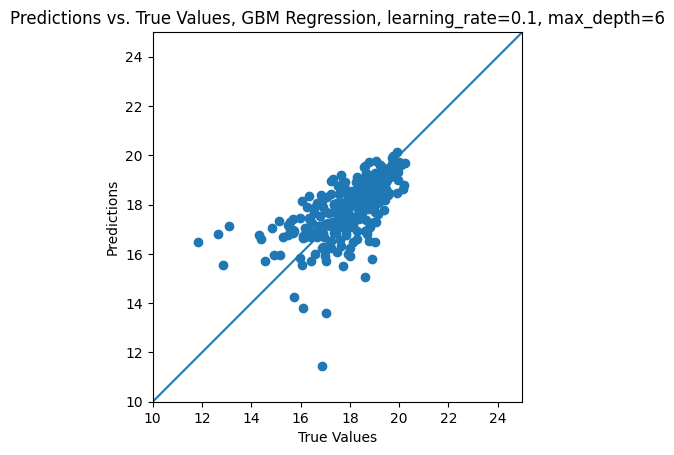

In [14]:
n = 58
model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

plt.scatter(y_test, predictions)
plt.title('Predictions vs. True Values, GBM Regression, learning_rate=0.1, max_depth=6')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,25])
plt.ylim([10,25])
_ = plt.plot([-100, 100], [-100, 100])


ratio = helper.revenue_exp(y_test) / helper.revenue_exp(predictions)
print("ratio")
print(ratio.describe())